### 1. Instale o FastAPI e o servidor Uvicorn no seu ambiente local. Apresente um print da instalação bem-sucedida.

In [2]:
!pip install fastapi
!pip install pydantic
!pip install uvicorn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Crie uma aplicação básica em FastAPI que exiba a mensagem "Hello, FastAPI!" na rota principal (/). Execute a aplicação e envie um print da resposta no navegador.

In [30]:
%%writefile "routers/tp1_a.py"
from fastapi import APIRouter

router = APIRouter(
    prefix="/tp1_a"
)

@router.get("/")
def hello():
    return "Hello, FastAPI!"

Writing routers/tp1_a.py


uvicorn main:api --reload --port 8001

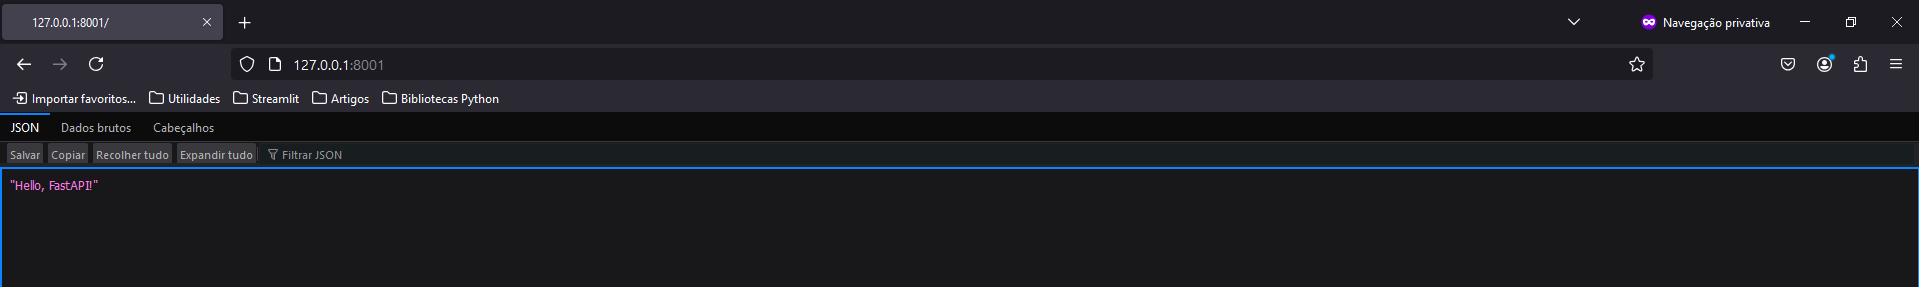

### 3. Adicione mais duas rotas na sua aplicação:
- Uma rota /status que retorna uma mensagem indicando que o servidor está funcion ando.
- Uma rota /user/{username} que receba um parâmetro na URL e retorne uma saudação personalizada para o usuário.


In [31]:
%%writefile -a "routers/tp1_a.py"

@router.get("/status")
def status():
    return {"status": "ok"}

@router.get("/user/{username}")
def hello_user(username: str):
    return f"Hello, {username}!"

Appending to routers/tp1_a.py


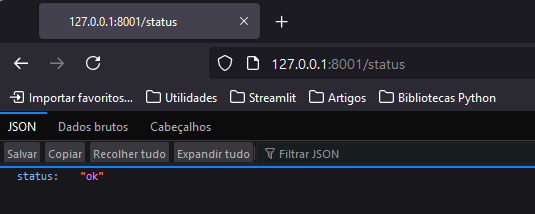

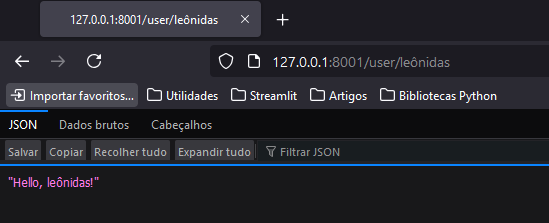

### 4. Estruture seu projeto FastAPI de forma organizada, separando o código em múltiplos arquivos:
- Um arquivo para as rotas (routes.py).
- Um arquivo principal para a execução do app (main.py).
- Explique brevemente como essa estrutura ajuda na organização e manutenção do projeto.


In [36]:
%%writefile "main.py"
from fastapi import FastAPI
from routers.tp1_a import router as tp1_a_router
from routers.tp1_b import router as tp1_b_router
from routers.tp1_c import router as tp1_c_router

api = FastAPI()
api.include_router(tp1_a_router)
api.include_router(tp1_b_router)
api.include_router(tp1_c_router)

@api.get("/")
def read_root():
    return {"message": "API do TP1"}

Overwriting main.py


In [37]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_a"
r = requests.get(f'{API_URL}/')
print(r.json())

Hello, FastAPI!


**R.:** 

- Melhor organização, podendo separar em cada arquivo um conjunto de serviços específicos
- Escalabilidade, sendo simplesmente criar novos serviços em novos arquivos de rotas
- Modularidade, cada conjunto de serviços está isolada em arquivos diferentes, evitando que problemas afetem todos os serviços

### 5. Crie um Response Model para a rota /user/{username} que retorne um JSON com o nome do usuário e uma mensagem.

Exemplo de resposta:

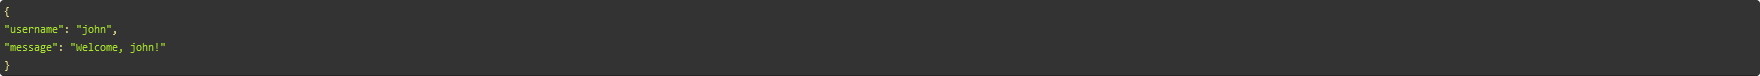

In [33]:
%%writefile "routers/tp1_b.py"
from fastapi import APIRouter

router = APIRouter(
    prefix="/tp1_b"
)

@router.get("/user/{username}")
def hello_user(username: str):
    return {'username': username, 'message': f"Welcome, {username}!"}

Overwriting routers/tp1_b.py


In [36]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_b"
r = requests.get(f'{API_URL}/user/Leo')
print(r.json())

{'username': 'Leo', 'message': 'Welcome, Leo!'}


### 6. Implemente o tratamento de erro para a rota /user/{username}, retornando uma mensagem de erro 404 se o nome de usuário não for encontrado. 

- Utilize o modelo de exceção HTTP: from fastapi import HTTPException 

In [21]:
%%writefile "routers/tp1_c.py"
from fastapi import APIRouter
from fastapi import HTTPException 
from pydantic import BaseModel, Field
from datetime import date


router = APIRouter(
    prefix="/tp1_c"
)

class User(BaseModel):
    name: str = Field(alias='nome')
    age: int = Field(alias='idade')
    
    class Config:
        populate_by_name = True

current_users = [
    {'nome': 'Alice', 'idade': 35},
    {'nome': 'Bob', 'idade': 45},
    {'nome': 'Charlie', 'idade': 55},
]

@router.get("/user/{username}")
def hello_user(username: str):
    if username in [user['nome'] for user in current_users]:
        return f"Hello, {username}!"
    else:
        raise HTTPException(status_code=404, detail='Erro 404: Nome de usuário não encontrado')

Overwriting routers/tp1_c.py


In [33]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_c"
r = requests.get(f'{API_URL}/user/Leo')
print(r.json())

{'detail': 'Erro 404: Nome de usuário não encontrado'}


### 7. Adicione uma rota POST chamada /create-user que receba um nome de usuário e idade via JSON no corpo da requisição, e retorne os dados recebidos.

Exemplo de corpo da requisição:

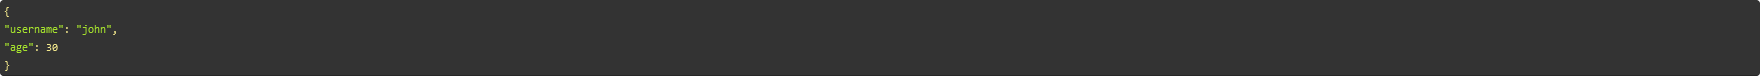

In [22]:
%%writefile -a "routers/tp1_c.py"

@router.post("/create-user")
def create_user(newUser: User):
    global current_users
    if newUser.dict() in current_users:
        return 'Usuário já existe'
    current_users.append(newUser.dict())
    return 'Usuário criado com sucesso'

Appending to routers/tp1_c.py


In [2]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_c"
r = requests.post(f'{API_URL}/create-user', json={"nome": 'Leo', "idade": 10})
print(r.json())

Usuário já existe


### 8. Utilize o Pydantic para validar a entrada de dados na rota /create-user. O nome de usuário deve ser uma string e a idade um número inteiro positivo. Caso os dados sejam inválidos, a API deve retornar um erro apropriado.

In [6]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_c"
r = requests.post(f'{API_URL}/create-user', json={"nome": 60, "idade": 'Indefinida'})
print(r.json())

{'detail': [{'type': 'string_type', 'loc': ['body', 'nome'], 'msg': 'Input should be a valid string', 'input': 60}, {'type': 'int_parsing', 'loc': ['body', 'idade'], 'msg': 'Input should be a valid integer, unable to parse string as an integer', 'input': 'Indefinida'}]}


### 9. Crie uma rota /item/{item_id} que suporte os métodos GET e DELETE:
- GET: Retorna o item correspondente ao item_id.
- DELETE: Remove o item do sistema e retorna uma mensagem de confirmação.

In [23]:
%%writefile -a "routers/tp1_c.py"

items = [
    {"item_id": 1, "q": "foo"},
    {"item_id": 2, "q": "bar"},
    {"item_id": 3, "q": "baz"},
]

@router.get("/item/{item_id}")
def get_item(item_id: int):
    if item_id not in [item['item_id'] for item in items]:
        raise HTTPException(status_code=400, detail="Erro 400 - Item não encontado")
    return items[item_id]

@router.delete("/item/{item_id}")
def delete_item(item_id: int):
    global items
    if item_id not in [item['item_id'] for item in items]:
        raise HTTPException(status_code=400, detail="Erro 400 - Item não encontado")
    items.pop(item_id)
    return {"message": "Item deletado com sucesso"}

Appending to routers/tp1_c.py


In [17]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_c"
r = requests.get(f'{API_URL}/item/1')
print(r.json())

{'item_id': 2, 'q': 'bar'}


In [18]:
r = requests.delete(f'{API_URL}/item/1')
print(r.json())

{'message': 'Item deletado com sucesso'}


### 10. Implemente uma exceção personalizada para tratar erros de validação na rota /item/{item_id}, retornando uma mensagem de erro 400 caso o item_id seja inválido.

In [19]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_c"
r = requests.get(f'{API_URL}/item/10')
print(r.json())

{'detail': 'Item não encontado'}


### 11. Crie uma rota POST chamada /birthday que receba um nome e uma data de aniversário (no formato "YYYY-MM-DD") via JSON no corpo da requisição. A rota deve calcular quantos dias faltam até o próximo aniversário da pessoa e retornar uma mensagem personalizada.

In [28]:
%%writefile -a "routers/tp1_c.py"

class UserBirthday(BaseModel):
    name: str = Field(alias='nome')
    birthday: date = Field(alias='aniversario')
    
    class Config:
        populate_by_name = True

@router.post("/birthday")
def day_to_birthday(userBirthday: UserBirthday):
    today = date.today()
    next_birthday = userBirthday.birthday.replace(year=today.year)

    if next_birthday < today:
        next_birthday = next_birthday.replace(year=today.year + 1)

    days_until_birthday = (next_birthday - today).days

    return f"Faltam {days_until_birthday} dias para o aniversário de {userBirthday.name}"

Appending to routers/tp1_c.py


In [31]:
import requests
API_URL = "http://127.0.0.1:8001/tp1_c"
r = requests.post(f'{API_URL}/birthday', json={"nome": 'Leo', "birthday": '1994-11-03'})
print(r.json())

Faltam 8 dias para o aniversário de Leo


### 12. Use o Swagger UI integrado ao FastAPI para gerar automaticamente a documentação das rotas criadas neste exercício. Envie um print da interface gerada pelo Swagger.

http://127.0.0.1:8001/docs

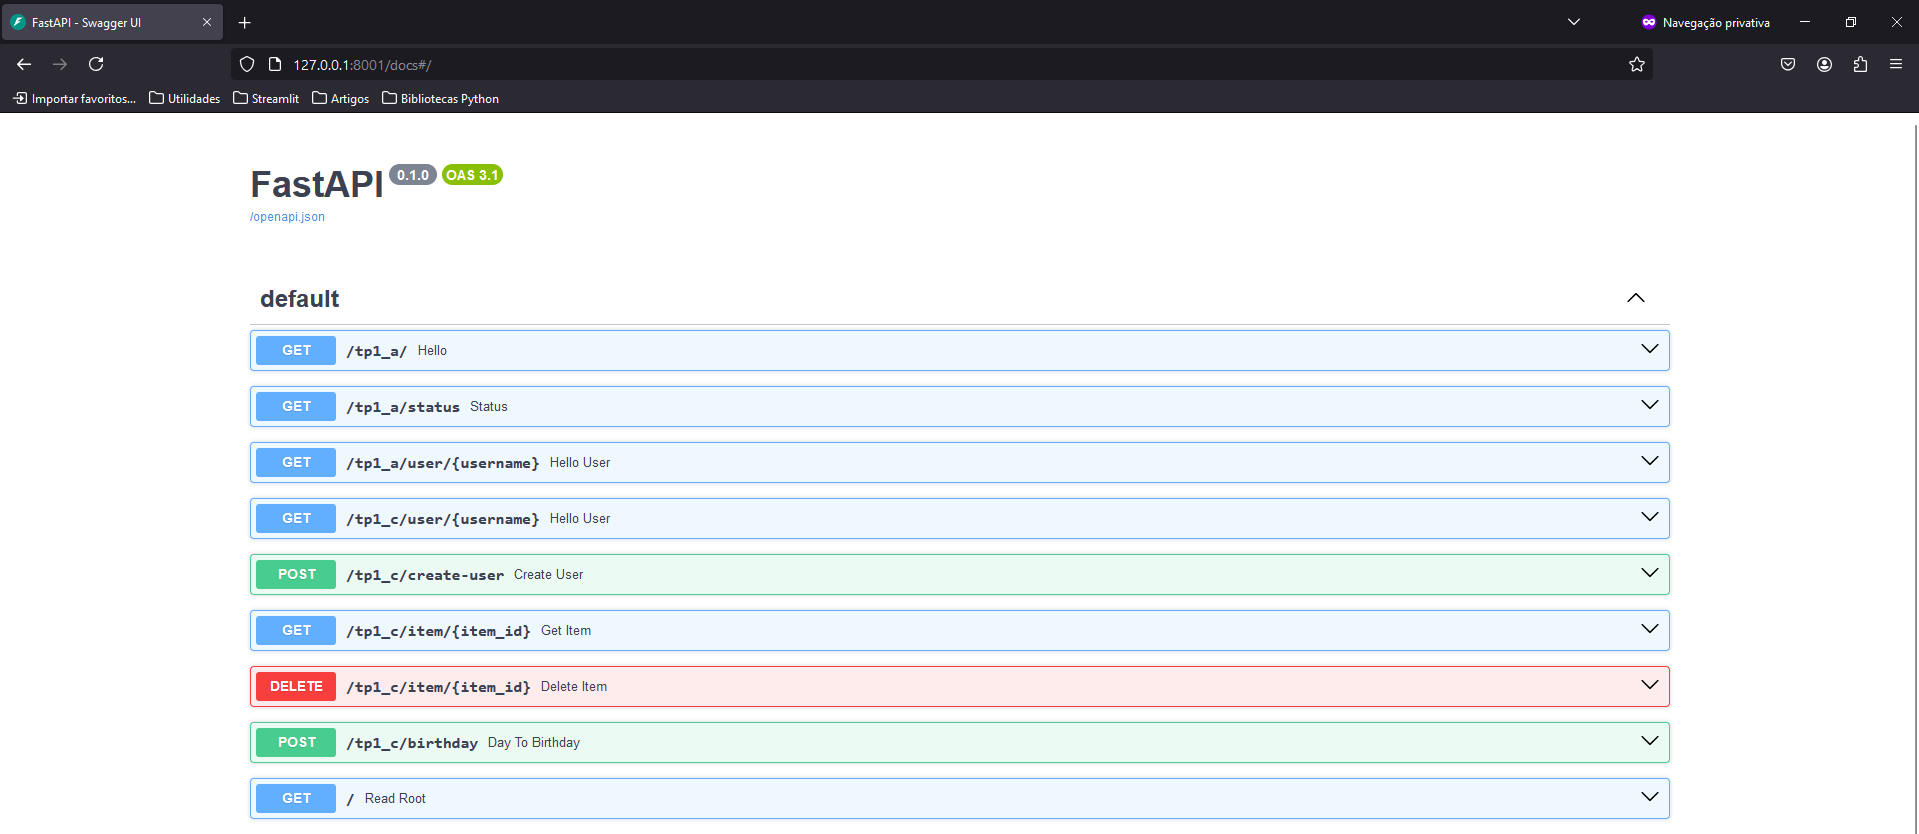